# Credit EDA Case Study
### * By Saurabh Vyawahare and Lakshit Aswal 

- ## Introduction

  In this notebook, we have mainly focused on analysing the data of current and previous bank loan applicant.
  The datasets contains their information about their current and previous loan details.

- ## Approach

  For the Exploratory data analysis, mentioned steps have been followed.
  
  - Import Modules
  - Read dataset
  - Data cleaning
  - Univariate Analysis
  - Bivariate and Multivariate Analysis

In [1]:
#Importing necessary libraries
import numpy as np, pandas as pd, seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

In [2]:
#Reading application dataset
df = pd.read_csv('application_data.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [3]:
#Checking the shape of the dataset
df.shape

(307511, 122)

In [4]:
#Describing the dataset to understand the tendencies of the dataset as well distribution.

df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

Now we'll be visualising the null distribution in the dataset.
We will be dropping the columns with more than 40% null values.

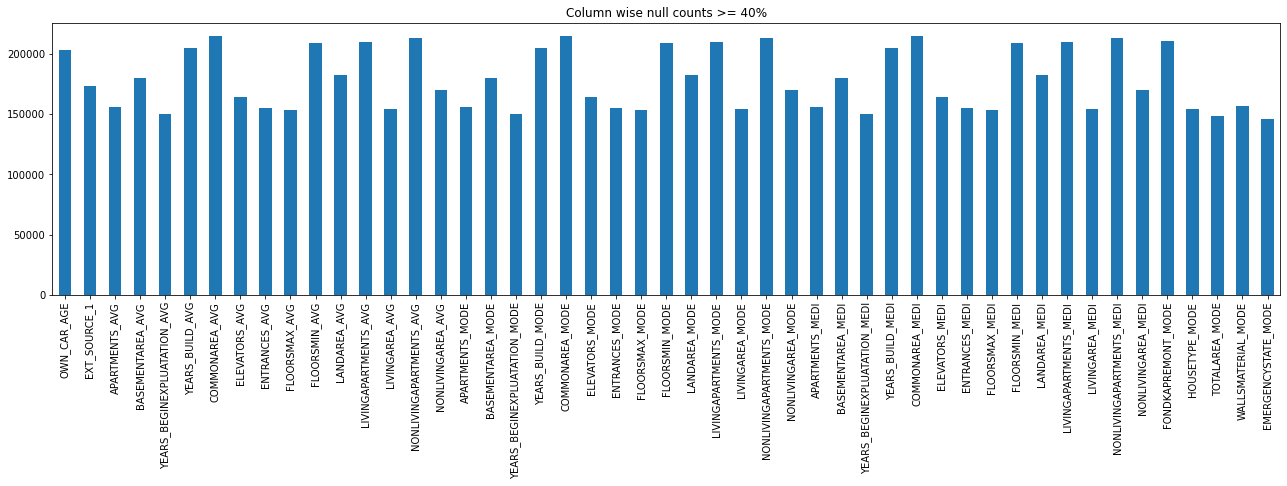

In [5]:
null_cols = df.isnull().sum()
null_cols = null_cols[null_cols.values> (0.4*df.shape[0])]

plt.figure(figsize=(22,5))
plt.title('Column wise null counts >= 40%')
null_cols.plot(kind = 'bar')
plt.show()

In [6]:
#Dropping the null columns.

df.drop(null_cols.index, axis = 1, inplace = True)

In [7]:
#Checking shape of dataset after dropping of huge null data.

df.shape

(307511, 73)

Let's once more check the remaining null values in the columns, in order to impute them as required.

In [8]:
# Extracting null percentage column wise and sorting them to display.

nulls = (df.isnull().sum()/df.shape[0])*100
nulls.sort_values(ascending = False).head(27)

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
NAME_TYPE_SUITE                0.420148
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
NAME_INCOME_TYPE               0.000000
FLAG_OWN_REALTY                0.000000
TARGET                         0.000000
FLAG_EMAIL                     0.000000
FLAG_PHONE                     0.000000
FLAG_CONT_MOBILE               0.000000
NAME_CONTRACT_TYPE             0.000000


We have to replace null values in 'Occupation Type' column with 'unknown' as it is not feasable to impute them with mode or median. This will create a new category 'unknown' in the column.

In [9]:
df.OCCUPATION_TYPE = df.OCCUPATION_TYPE.replace(np.nan, 'unknown')

A huge chunk of columns/features are there that might not be of any use, or may not reveal anything about the client.
So they are to be removed from the dataset prior to do further analysis.

In [10]:
#Listing the unwanted columns from the dataset.

unwanted=['EXT_SOURCE_2','EXT_SOURCE_3','FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY']

# Dropping the columns in 'unwanted' variable from the dataset.

df.drop(labels=unwanted,axis=1,inplace=True)

We are still left with so many columns having null values, that we need to take care of.
So we have to check again with columns and their null counts.

In [11]:
df.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OCCUPATION_TYPE                    0
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
LIVE_REGION_NOT_WORK_REGION        0
R

The mode value of 'OBS_' and 'DEF_' columns and 'AMT_REQ_' columns are all 0.0 thus imputing the null values with mode is better than imputing with median or mean, since this distribution is very uneven.

In [12]:
print(df.OBS_30_CNT_SOCIAL_CIRCLE.mode())
print(df.DEF_30_CNT_SOCIAL_CIRCLE.mode())
print(df.AMT_REQ_CREDIT_BUREAU_HOUR.mode())
print(df.AMT_REQ_CREDIT_BUREAU_WEEK.mode())

0    0.0
dtype: float64
0    0.0
dtype: float64
0    0.0
dtype: float64
0    0.0
dtype: float64


Imputing null values of all below columns with mode of each column.

In [13]:
df.OBS_30_CNT_SOCIAL_CIRCLE = df.OBS_30_CNT_SOCIAL_CIRCLE.replace(np.nan, 0.0)
df.DEF_30_CNT_SOCIAL_CIRCLE = df.DEF_30_CNT_SOCIAL_CIRCLE.replace(np.nan,0.0)
df.OBS_60_CNT_SOCIAL_CIRCLE = df.OBS_60_CNT_SOCIAL_CIRCLE.replace(np.nan,0.0)
df.DEF_60_CNT_SOCIAL_CIRCLE = df.DEF_60_CNT_SOCIAL_CIRCLE.replace(np.nan,0.0)
df.AMT_REQ_CREDIT_BUREAU_HOUR = df.AMT_REQ_CREDIT_BUREAU_HOUR.replace(np.nan,0.0)
df.AMT_REQ_CREDIT_BUREAU_DAY = df.AMT_REQ_CREDIT_BUREAU_DAY.replace(np.nan,0.0)
df.AMT_REQ_CREDIT_BUREAU_WEEK = df.AMT_REQ_CREDIT_BUREAU_WEEK.replace(np.nan,0.0)
df.AMT_REQ_CREDIT_BUREAU_MON = df.AMT_REQ_CREDIT_BUREAU_MON.replace(np.nan,0.0)
df.AMT_REQ_CREDIT_BUREAU_QRT = df.AMT_REQ_CREDIT_BUREAU_QRT.replace(np.nan,0.0)
df.AMT_REQ_CREDIT_BUREAU_YEAR = df.AMT_REQ_CREDIT_BUREAU_YEAR.replace(np.nan,0.0)

In [14]:
#Checking values counts of Goods Price column
df.AMT_GOODS_PRICE.value_counts()

450000.0    26022
225000.0    25282
675000.0    24962
900000.0    15416
270000.0    11428
            ...  
705892.5        1
442062.0        1
353641.5        1
353749.5        1
738945.0        1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

In [15]:
#Finding the median value of the AMT_GOOD_PRICE column

df.AMT_GOODS_PRICE.median()

450000.0

For AMT_GOODS_PRICE imputing null values with median as mean and mode would not be feasible choice.

In [16]:
# Imputing AMT_GOODS_PRICE null values.

df.AMT_GOODS_PRICE.fillna(df.AMT_GOODS_PRICE.median(), inplace = True)

In [17]:
# Checking value counts for the AMT_ANNUITY column

df.AMT_ANNUITY.value_counts()

9000.0     6385
13500.0    5514
6750.0     2279
10125.0    2035
37800.0    1602
           ... 
15210.0       1
50265.0       1
73012.5       1
40558.5       1
4437.0        1
Name: AMT_ANNUITY, Length: 13672, dtype: int64

In [18]:
# Finding median value of AMT_ANNUITY column

df.AMT_ANNUITY.median()

24903.0

Imputing null values of AMT_ANNUITY with median value of the column.

In [19]:
df.AMT_ANNUITY.fillna(df.AMT_ANNUITY.median(), inplace = True)

Imputing null values of NAME_TYPE_SUITE column with a new 'unknown' category.

In [20]:
df.NAME_TYPE_SUITE = df.NAME_TYPE_SUITE.replace(np.nan, 'unknown')

In [21]:
#Checking once again the number of null values in the dataset.

df.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
OCCUPATION_TYPE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
ORGANIZATI

Column CODE_GENDER have 'XNA' categorical value, which means 'not available'.

In [22]:
df.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

Since the count of 'XNA' value is too less, it is safe to replace it with the mode value of the column.

In [23]:
#Replacing XNA with mode of CODE_GENDER F
df.CODE_GENDER = df.CODE_GENDER.replace('XNA','F')
df.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

Column ORGANIZATION_TYPE also have 'XNA' values in it. Let's see.

In [24]:
df.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

Value count of 'XNA' for ORGANIZATION_TYPE column is very large, therefore imputing it with mode of the column would be a feasible.

In [25]:
df.ORGANIZATION_TYPE = df.ORGANIZATION_TYPE.replace('XNA', np.nan)

In [26]:
df.AMT_INCOME_TOTAL.value_counts()

135000.0    35750
112500.0    31019
157500.0    26556
180000.0    24719
90000.0     22483
            ...  
101119.5        1
79425.0         1
101128.5        1
202275.0        1
262174.5        1
Name: AMT_INCOME_TOTAL, Length: 2548, dtype: int64

For 'AMT_CREDIT' and 'AMT_INCOME_TOTAL' columns which have values continous in nature, we will create bins with a large range upto 10000000000.

In [27]:
bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slots = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

df['AMT_INCOME_RANGE'] = pd.cut(df.AMT_INCOME_TOTAL, bins, labels = slots)

In [28]:
bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

df['AMT_CREDIT_RANGE'] = pd.cut(df.AMT_CREDIT, bins = bins, labels = slots)

Distributing the datasets w.r.t target variables 0 and 1.

In [29]:
target0 = df.loc[df["TARGET"] == 0]
target1 = df.loc[df["TARGET"] == 1]

#Calculating the imbalance ratio of the two target variables.

round(len(target0) / len(target1), 2)

11.39

The imbalance ratio came out to be 11.39.

## Univariate Analysis for target0 (No difficulties)

Ploting a countplot of Income range of clients w.r.t Gender distribution.

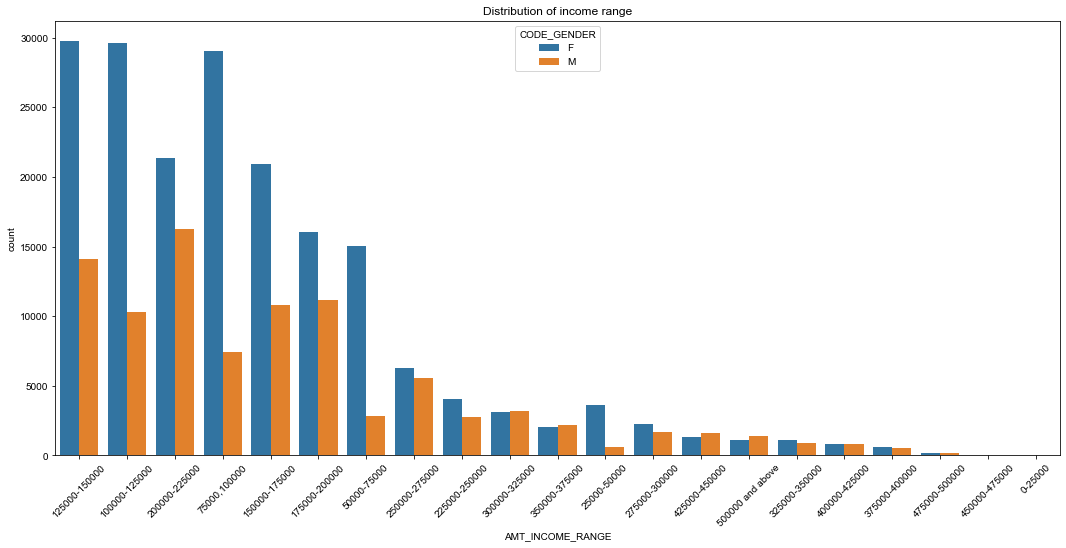

In [30]:
plt.figure(figsize = (18,8))
sns.countplot(data = target0, x = 'AMT_INCOME_RANGE', order = target0.AMT_INCOME_RANGE.value_counts().index, hue='CODE_GENDER')
plt.title('Distribution of income range')
plt.xticks(rotation=45)
sns.set_style('whitegrid')
plt.show()

<ol>1.Income range from 100000 to 200000 is having more number of credits.</ol>
<ol>2.Graph depicts that females are more than male in having credits for the range.</ol>
<ol>3.Very less count for the income range of 400000 and above.</ol>

Countplot of Income type with Gender distribution.

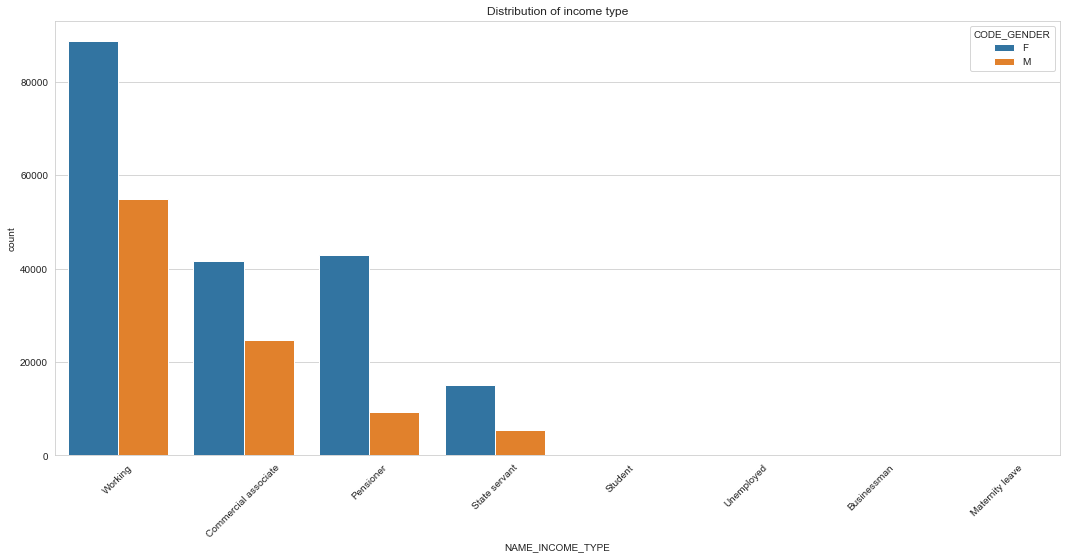

In [31]:
plt.figure(figsize = (18,8))
sns.countplot(data = target0, x = 'NAME_INCOME_TYPE', order = target0.NAME_INCOME_TYPE.value_counts().index, hue='CODE_GENDER')
plt.title('Distribution of income type')
plt.xticks(rotation=45)
sns.set_style('whitegrid')
plt.show()

In [32]:
#Checking the value counts for Income type columns to verify the above countplot.
df.NAME_INCOME_TYPE.value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

<ol>1.For income type working, commercial associate, and State Servant the number of credits are higher than others.</ol>
<ol>2.For this Females are having more number of credits than male.</ol>
<ol>3.Less number of credits for income type student ,pensioner, Businessman and Maternity leave.</ol>

Countplot for the Contract Type column.

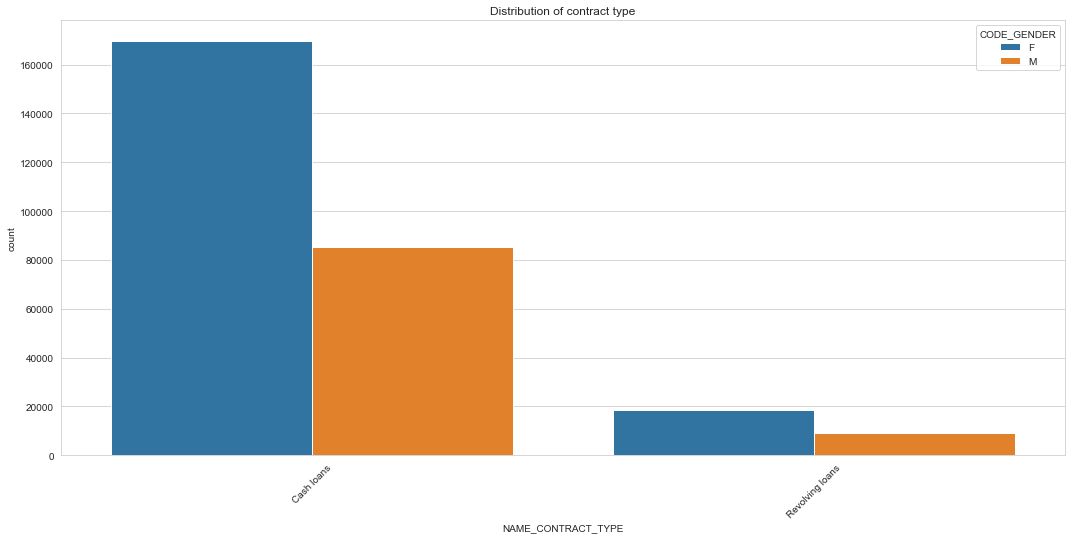

In [33]:
plt.figure(figsize = (18,8))
sns.countplot(data = target0, x = 'NAME_CONTRACT_TYPE', order = target0.NAME_CONTRACT_TYPE.value_counts().index, hue='CODE_GENDER')
plt.title('Distribution of contract type')
plt.xticks(rotation=45)
sns.set_style('whitegrid')
plt.show()

<ol>1.For contract type cash loans is having higher number of credits than Revolving loans.</ol>
<ol>2.For this also Female is leading for applying credits.</ol>

Distribution of Organization Type.

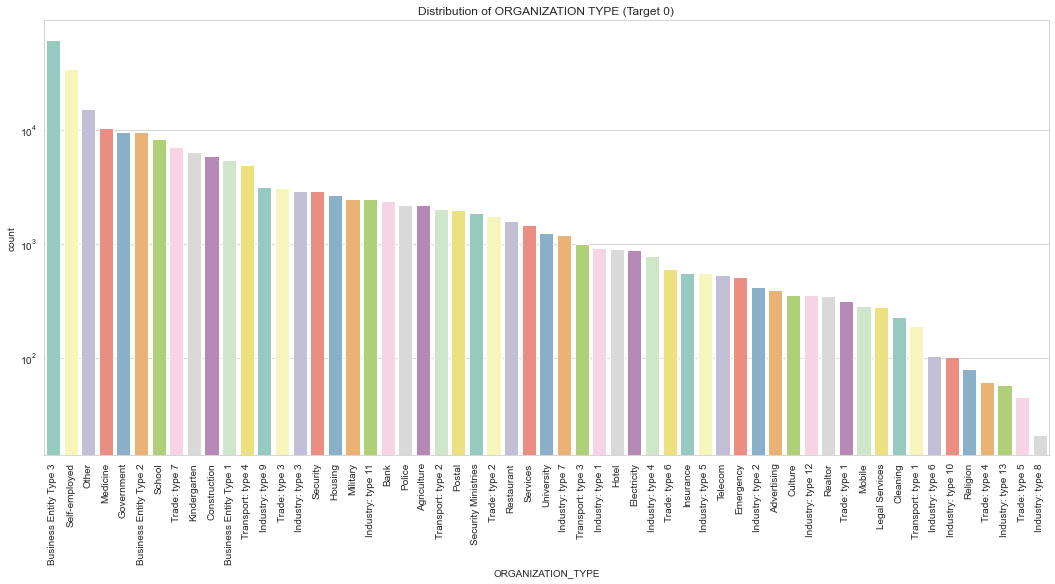

In [34]:
plt.figure(figsize = (18,8))
plt.yscale('log')
sns.countplot(data = target0, x = 'ORGANIZATION_TYPE', order = target0.ORGANIZATION_TYPE.value_counts().index, palette="Set3")
plt.title('Distribution of ORGANIZATION TYPE (Target 0)')
plt.xticks(rotation = 90)
sns.set_style('whitegrid')
plt.show()

<ol>1.Clients who have applied for credits are mostly from organization type Business entity Type 3 , Self employed, Other , Medicine and Government.</ol>
<ol>2.Less clients are from Industry type 8,type 6, type 10, religion and trade type 5, type 4.</ol>

## Univariate Analysis for target1 (With difficulties)

Income range with Gender distribution.

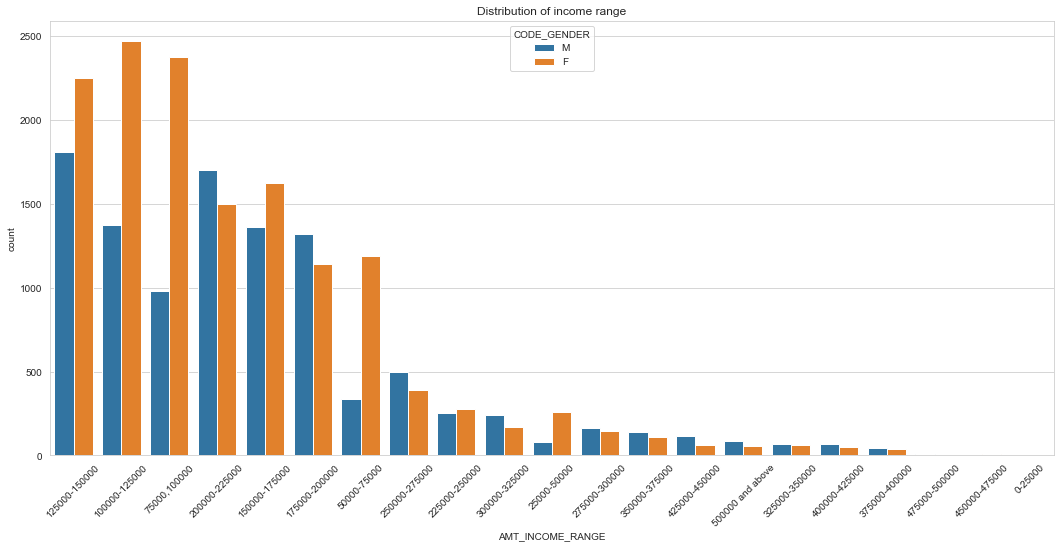

In [35]:
plt.figure(figsize = (18,8))
sns.countplot(data = target1, x = 'AMT_INCOME_RANGE', order = target1.AMT_INCOME_RANGE.value_counts().index, hue='CODE_GENDER')
plt.title('Distribution of income range')
plt.xticks(rotation=45)
sns.set_style('whitegrid')
plt.show()

<ol>1.In some ranges male counts are higher than females.</ol>
<ol>2.Income range from 100000 to 200000 is having more number of credits.</ol>
<ol>3.Very less count for income range of 400000 and above.</ol>

Income Type by Gender distribution.

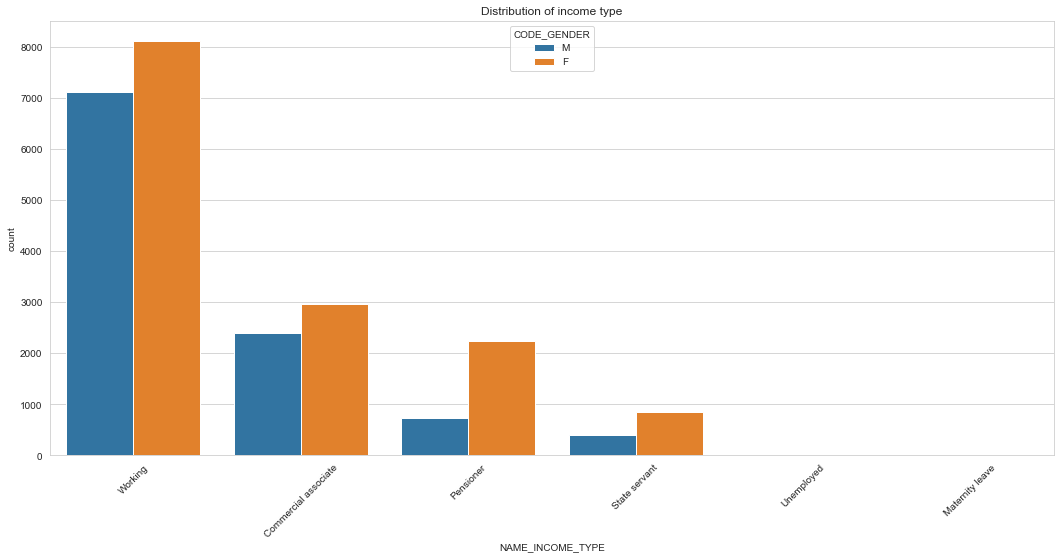

In [36]:
plt.figure(figsize = (18,8))
sns.countplot(data = target1, x = 'NAME_INCOME_TYPE', order = target1.NAME_INCOME_TYPE.value_counts().index, hue='CODE_GENDER')
plt.title('Distribution of income type')
plt.xticks(rotation=45)
sns.set_style('whitegrid')
plt.show()

<ol>1.For income type working, commercial associate, and Pensioner the number of credits are higher than others.</ol>
<ol>2.Here also Females are having more number of credits than male.</ol>
<ol>3.Less number of credits for income type Maternity leave and 'Unemployed'.</ol>

Countplot for Contract Type w.r.t Gender.

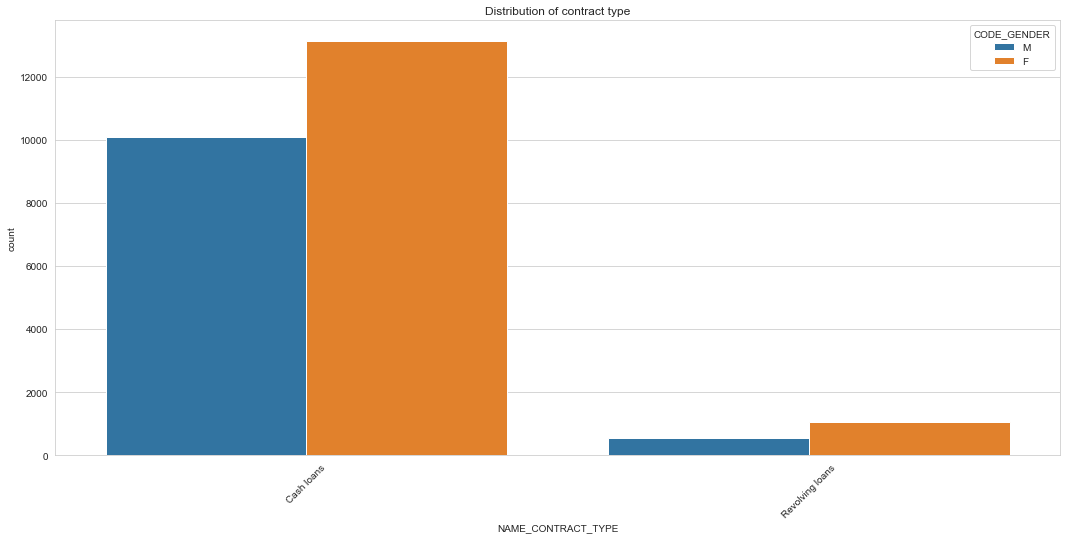

In [37]:
plt.figure(figsize = (18,8))
sns.countplot(data = target1, x = 'NAME_CONTRACT_TYPE', order = target1.NAME_CONTRACT_TYPE.value_counts().index, hue='CODE_GENDER')
plt.title('Distribution of contract type')
plt.xticks(rotation=45)
sns.set_style('whitegrid')
plt.show()

<ol>1.Contract type cash loans is have higher number of credits than Revolving loans.</ol>
<ol>2.Here also Female is leading for applying credits.</ol>

Organization Type distribution.

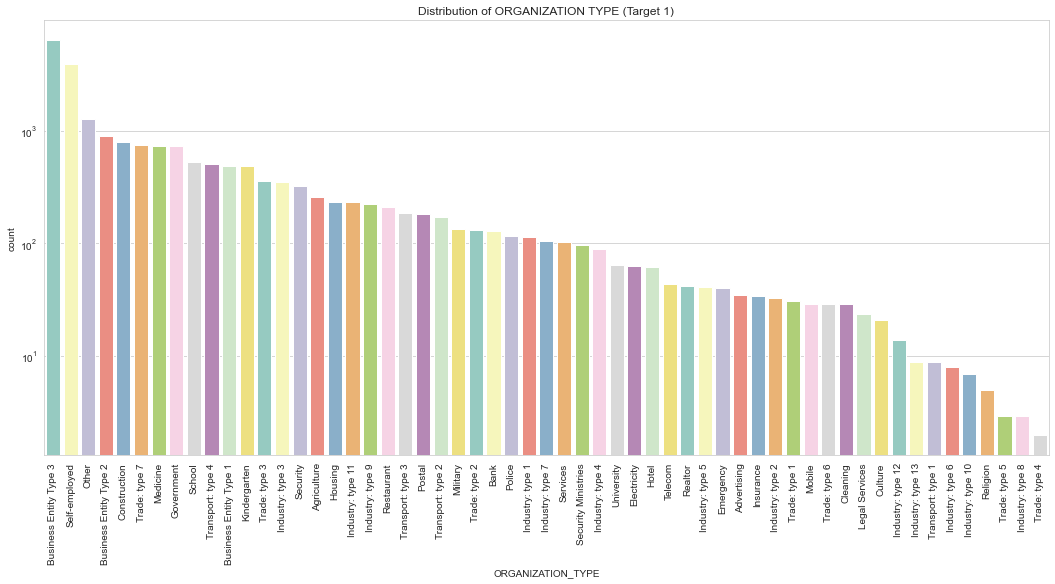

In [38]:
plt.figure(figsize = (18,8))
plt.yscale('log')
sns.countplot(data = target1, x = 'ORGANIZATION_TYPE', order = target1.ORGANIZATION_TYPE.value_counts().index, palette="Set3")
plt.title('Distribution of ORGANIZATION TYPE (Target 1)')
plt.xticks(rotation = 90)
sns.set_style('whitegrid')
plt.show()

<ol>1.Clients which have applied for credits are mostly from the organization type Business entity Type 3 , Self employed , Other , 'Business Entity Type 2', 'Construction'.</ol>
<ol>2.Less clients are from Trade type 4, type5, Industry type 8,type 10, type 6 and Religion.</ol>
<ol>3.Similar to distribution of target0.</ol>

### Detecting Outliers in the numeric columns for target0 (No Difficulties)

Boxplot for Total Income Amount

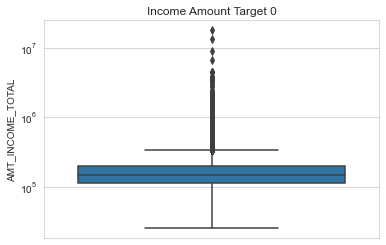

In [39]:
sns.set_style('whitegrid')
plt.title('Income Amount Target 0')
plt.yscale('log')
sns.boxplot(data = target0, y = 'AMT_INCOME_TOTAL')
plt.show()

<ol>1.Some outliers are noticed in total income amount.</ol>
<ol>2.The third quartiles is very slim for income amount.</ol>

Boxplot for Credit Amount

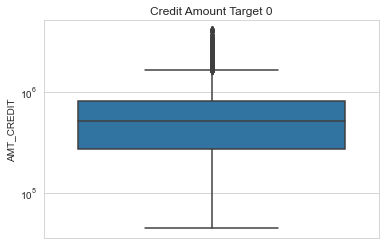

In [40]:
sns.set_style('whitegrid')
plt.title('Credit Amount Target 0')
plt.yscale('log')
sns.boxplot(data = target0, y = 'AMT_CREDIT')
plt.show()

<ol>1.Some outliers are noticed in credit amount.</ol>
<ol>2.The first quartile is bigger than third quartile which means most of the credits of clients are present in the first quartile.</ol>

Boxplot for Loan Annunity

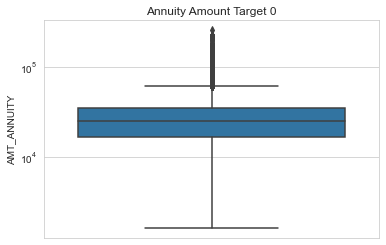

In [41]:
sns.set_style('whitegrid')
plt.title('Annuity Amount Target 0')
plt.yscale('log')
sns.boxplot(data = target0, y = 'AMT_ANNUITY')
plt.show()

<ol>1.Some outliers are noticed in annuity amount.</ol>
<ol>2.The first quartile is bigger than third quartile which means most of the annuity clients are from first quartile.</ol>

### Detecting Outliers in the numeric columns for target1 (With Difficulties)

Boxplot for Total Income Amount

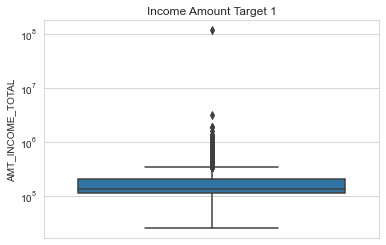

In [42]:
sns.set_style('whitegrid')
plt.title('Income Amount Target 1')
plt.yscale('log')
sns.boxplot(data = target1, y = 'AMT_INCOME_TOTAL')
plt.show()

<ol>1.Some outliers are noticed in income amount.</ol>
<ol>2.The third quartiles is very slim for income amount.</ol>
<ol>3.Most of the clients of income are present in first quartile.</ol>

Boxplot for Credit Amount

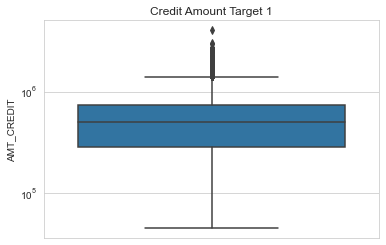

In [43]:
sns.set_style('whitegrid')
plt.title('Credit Amount Target 1')
plt.yscale('log')
sns.boxplot(data = target1, y = 'AMT_CREDIT')
plt.show()

<ol>1.Some outliers are noticed in credit amount.</ol>
<ol>2.The first quartile is bigger than third quartile for credit amount which means most of the credits of clients are present in the first quartile.</ol>

Boxplot for Loan ANNUITY

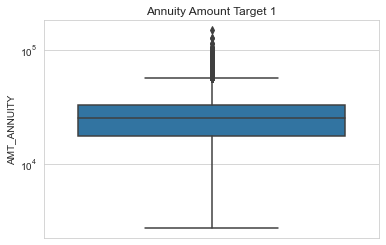

In [44]:
sns.set_style('whitegrid')
plt.title('Annuity Amount Target 1')
plt.yscale('log')
sns.boxplot(data = target1, y = 'AMT_ANNUITY')
plt.show()

<ol>1.Some outliers are noticed in annuity amount.</ol>
<ol>2.The first quartile is bigger than third quartile for annuity amount which means most of the annuity clients are from first quartile.</ol>

## Deriving correlation of columns for both target0 and target1.

In [45]:
# Deriving correlation for target 0
target0_corr = target0.iloc[:,2:31].corr(method='spearman')
# target0_corr

# Deriving correlation for target 1
target1_corr = target1.iloc[:,2:31].corr(method='spearman')
# target1_corr

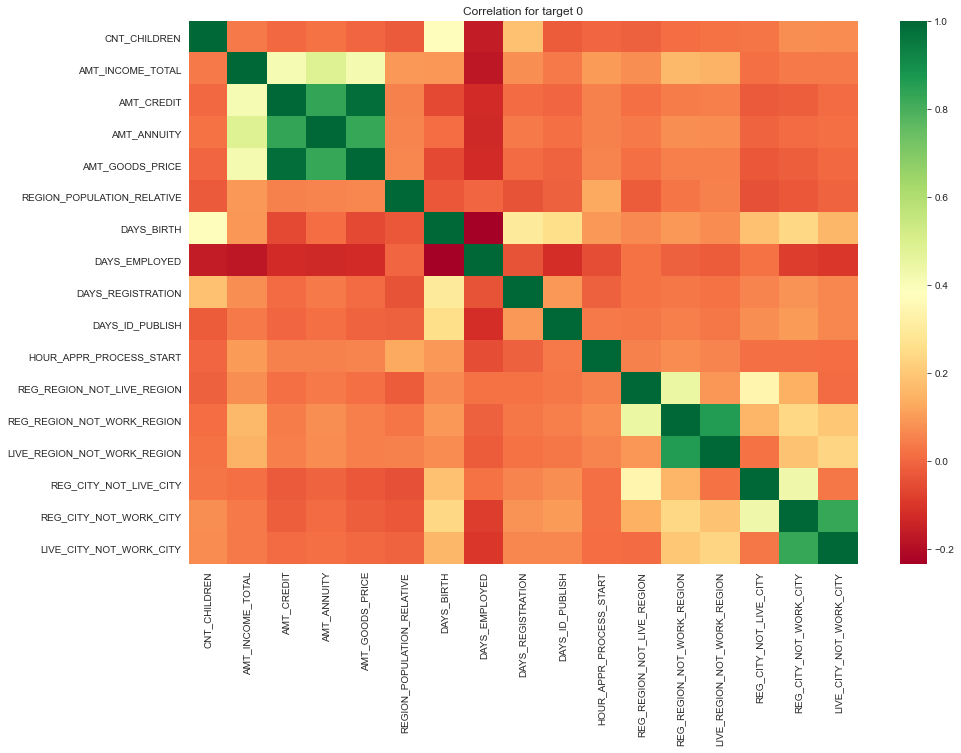

In [46]:
# Heatmap for correlation of target 0

plt.figure(figsize=(15, 10))
plt.title('Correlation for target 0')
sns.heatmap(target0_corr, cmap = "RdYlGn", annot = False)
plt.show()

<ol>1.Credit amount is inversely proportional to the date of birth, which means Credit amount is higher for low age and vice-versa.</ol>
<ol>2.Less children client have in densely populated area.</ol>
<ol>3.Credit amount is higher to densely populated area.</ol>
<ol>4.The income is also higher in densely populated area.</ol>

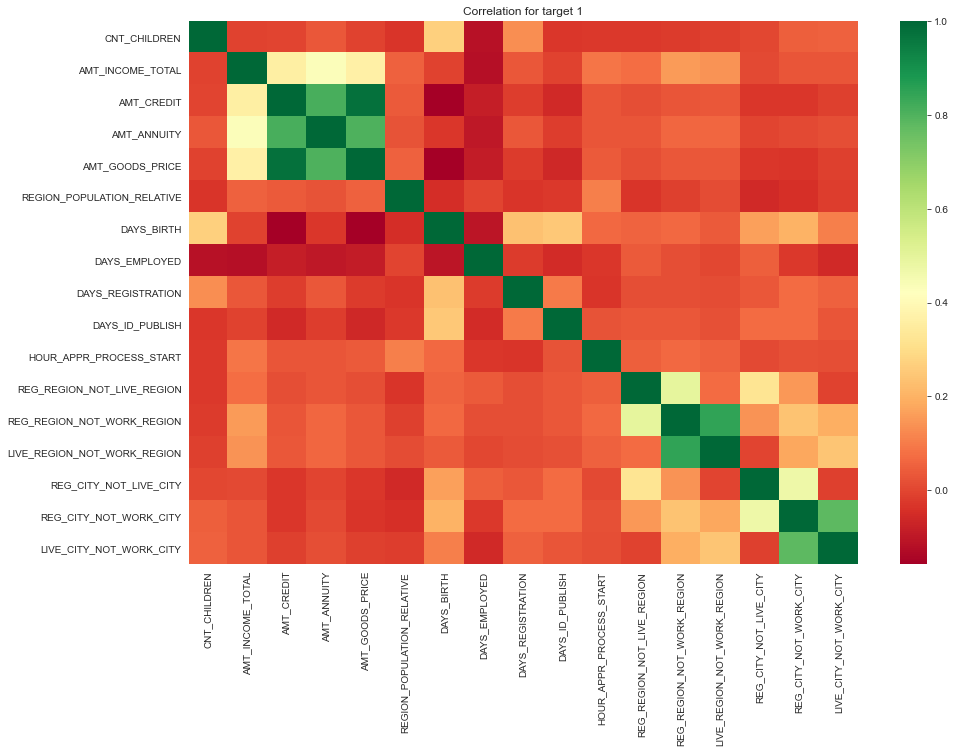

In [47]:
# Heatmap for correlation of target 0

plt.figure(figsize=(15, 10))
plt.title('Correlation for target 1')
sns.heatmap(target1_corr, cmap = "RdYlGn", annot = False)
plt.show()

#### Bivariate Analysis of numeric variables for target0 (No Difficulties).

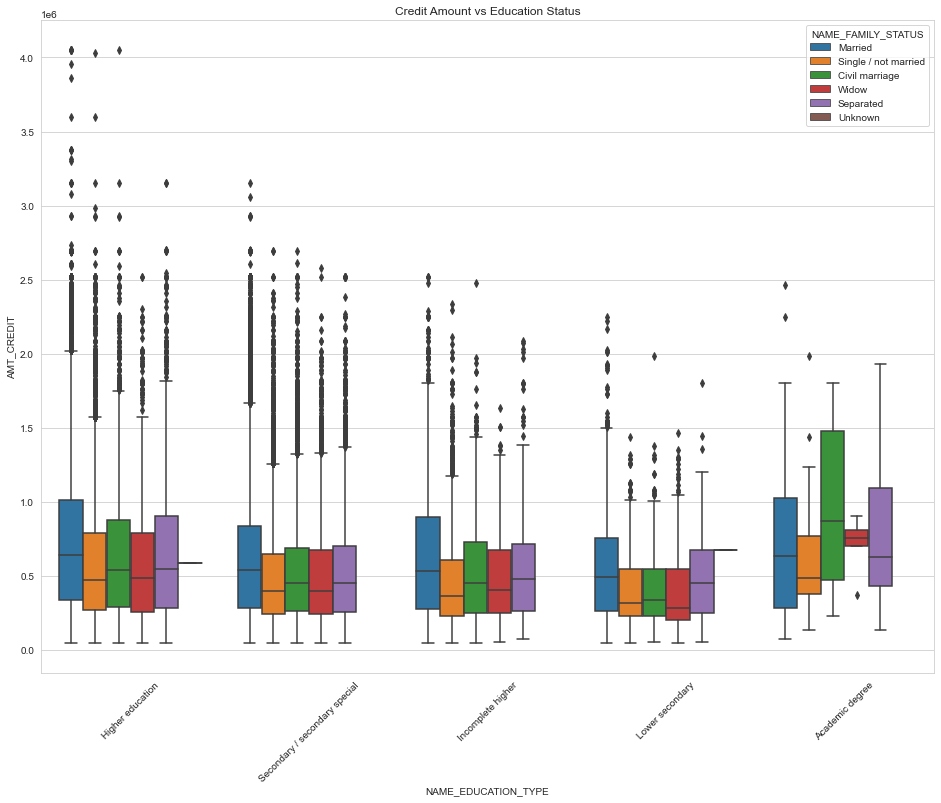

In [48]:
#Boxplot for Credit Amount in target 0

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target0, x = 'NAME_EDUCATION_TYPE', y = 'AMT_CREDIT', hue = 'NAME_FAMILY_STATUS', orient='v')
plt.title('Credit Amount vs Education Status')
plt.show()

<ol>1.In Higher education - 'marriage', 'single' and 'civil marriage' are having more outliers.</ol>
<ol>2.In Academic degree - 'civil marriage', 'marriage' and 'separated' are having higher number of credits than others.</ol>
<ol>3.Civil marriage in Academic degree have most of the credits in the third quartile.</ol>

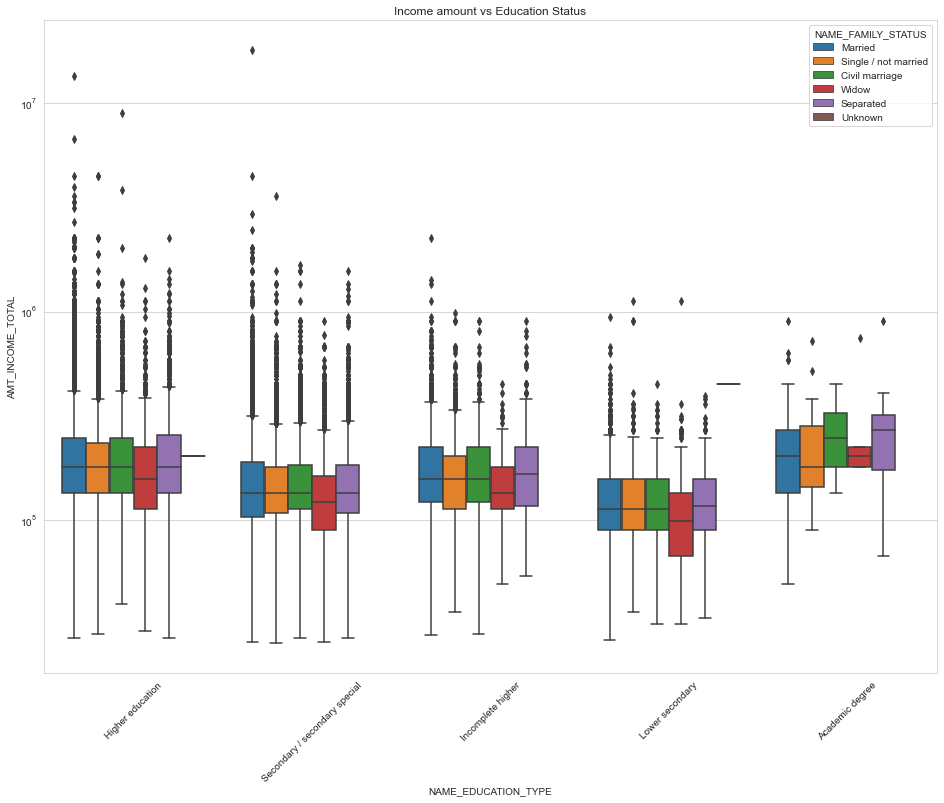

In [49]:
# Boxplot for Income amount in target 0

plt.figure(figsize = (16, 12))
plt.xticks(rotation = 45)
plt.yscale('log')
sns.boxplot(data = target0, x = 'NAME_EDUCATION_TYPE', y = 'AMT_INCOME_TOTAL', hue = 'NAME_FAMILY_STATUS', orient = 'v')
plt.title('Income amount vs Education Status')
plt.show()

<ol>1.In Higher education the Income amount is mostly equal with each family status.</ol>
<ol>2.Income amount for Academic degree holders is higher than Higher education holders.</ol>
<ol>3.Less outliers in Academic degree and most outliers in Higher education and Secondary education.</ol>
<ol>4.Lowest Income amount for Lower secondary holders.</ol>

### Bivariate Analysis of numeric variables for target1 (With Difficulties).

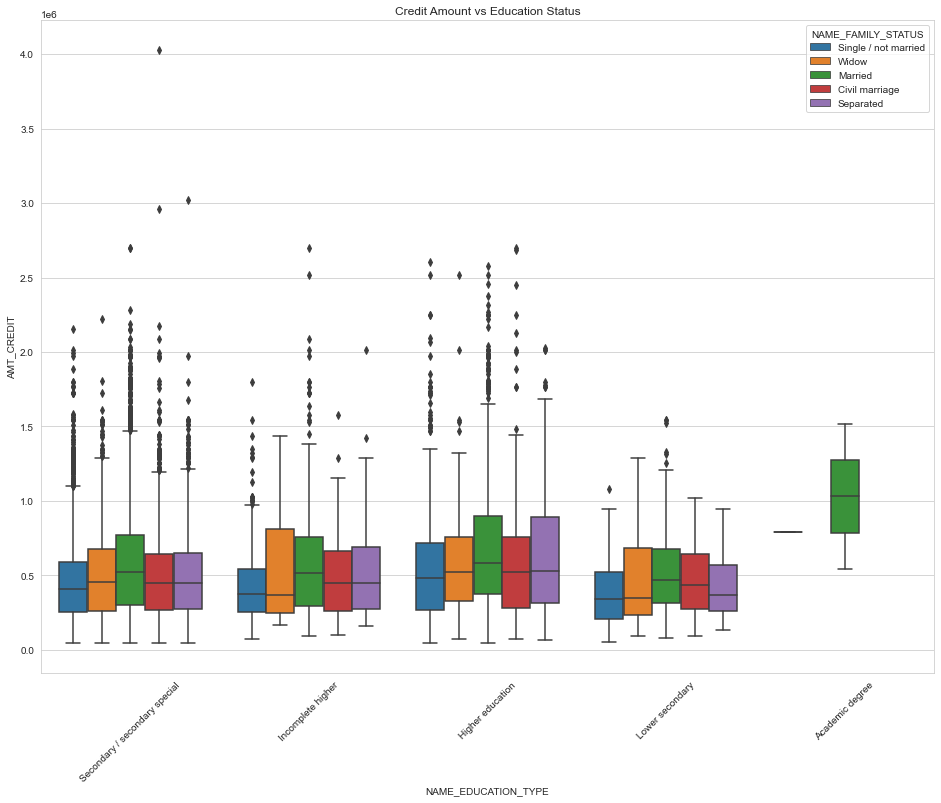

In [50]:
#Boxplot for Credit Amount in target 1

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target1, x = 'NAME_EDUCATION_TYPE', y = 'AMT_CREDIT', hue = 'NAME_FAMILY_STATUS', orient='v')
plt.title('Credit Amount vs Education Status')
plt.show()

<ol>1.Academic degree holders seems to have higher credit amount, though other family status is not available.</ol>
<ol>2.More outliers can be seen in Secondary education holders.</ol>
<ol>3.'Separated' and 'Married' clients have more credit amount in third quartile.</ol>
<ol>4.Lower sceondary holders have less credit amount comparing to others.</ol>

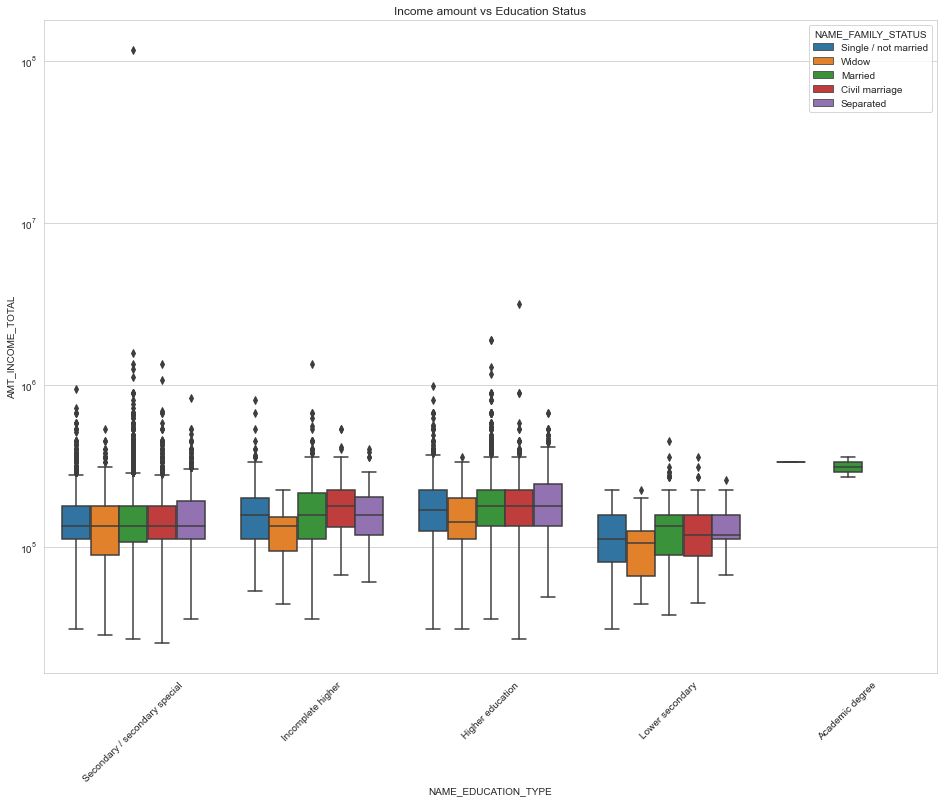

In [51]:
# Boxplot for Income amount in target 1

plt.figure(figsize = (16, 12))
plt.xticks(rotation = 45)
plt.yscale('log')
sns.boxplot(data = target1, x = 'NAME_EDUCATION_TYPE', y = 'AMT_INCOME_TOTAL', hue = 'NAME_FAMILY_STATUS', orient = 'v')
plt.title('Income amount vs Education Status')
plt.show()

Secondary special holders have almost same Income amount for all family status.

In [52]:
prev_ap_df = pd.read_csv("previous_application.csv")

#### Checking first five rows of data.
   we are using .head() function in pandas which will show us first five rows of both dataset.

In [53]:
prev_ap_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


#### Checking number of features and their datatype in dataframe.
   we are using .info() function in pandas which will show us number of features and their datatypes.

In [54]:
prev_ap_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [55]:
# printing shape of both datasets.
prev_ap_df.shape

(1670214, 37)

### <font color="Green"> Inference -</font>

   - prev_ap_df contains 37 features and 1670214 rows.<br>
     (Out of which 15 features are float64, 6 features are integer, 16 features are object datatype)

   - application_df contains 121 features, 1 target variable, and 307511 rows.<br>
     (Out of which 65 features are float64, 41 features are integer, 16 features are object datatype)
     
   - previous_application Dataset contains more number of rows than application_data Dataset.

- ## Data Cleaning

In [56]:
# Function_name : missingdata_percentage
# Usage : Returns % of missing values for all features in a DataFrame
# Arguments : dataframe
# Returns : a dataframe containing categories having missing values and % of missing values in those categories

def missingdata_percentage(df):
    missing = pd.DataFrame(columns=['category','percentage'])
    for col in df.columns:
        if df[col].isna().values.any():
            percentage = 100*df[col].isna().sum()/df.shape[0]
            missing = missing.append({'category' : col, 'percentage' : percentage}, ignore_index=True)
    return missing

In [57]:
missingdata_prev = missingdata_percentage(prev_ap_df)

In [58]:
missingdata_prev.sort_values('percentage', ascending=False)

,category,percentage
5,RATE_INTEREST_PRIMARY,99.643698
6,RATE_INTEREST_PRIVILEGED,99.643698
2,AMT_DOWN_PAYMENT,53.636480
4,RATE_DOWN_PAYMENT,53.636480
7,NAME_TYPE_SUITE,49.119754
10,DAYS_FIRST_DRAWING,40.298129
11,DAYS_FIRST_DUE,40.298129
12,DAYS_LAST_DUE_1ST_VERSION,40.298129
13,DAYS_LAST_DUE,40.298129
14,DAYS_TERMINATION,40.298129


### <font color="Green"> Inference -</font>
   - There are 16 features in prev_app_df that have missing values.
   - from the above mssing value data we can Permanently dropping the features (RATE_INTEREST_PRIMARY and RATE_INTEREST_PRIVILEGED) as 99% data is missing.

In [59]:
prev_ap_df.drop(['RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED'], axis=1, inplace=True)
prev_ap_df.dropna(subset=['AMT_CREDIT','PRODUCT_COMBINATION'], inplace=True)

#Checking the remaining columns
prev_ap_df

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.000000,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,Y,1,0.000000,XAP,Approved,-544,Cash through the bank,XAP,NaN,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,Y,1,0.340554,XAP,Approved,-1694,Cash through the bank,XAP,Unaccompanied,New,Furniture,POS,XNA,Stone,43,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,Y,1,0.101401,XAP,Approved,-1488,Cash through the bank,XAP,"Spouse, partner",Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,Y,1,NaN,XNA,Approved,-1185,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [60]:
# Extracting the numeric features from previous application data

numeric_features = []
for col in prev_ap_df.columns:
    if prev_ap_df[col].dtype == float or prev_ap_df[col].dtype == int:
        numeric_features.append(col)
        
print(numeric_features)

['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT', 'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']


In [61]:
prev_num_df = pd.DataFrame()

for col in numeric_features:
    prev_num_df[col] = prev_ap_df[col]
    
prev_num_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1669867 entries, 0 to 1670213
Data columns (total 13 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   AMT_ANNUITY                1297978 non-null  float64
 1   AMT_APPLICATION            1669867 non-null  float64
 2   AMT_CREDIT                 1669867 non-null  float64
 3   AMT_DOWN_PAYMENT           774370 non-null   float64
 4   AMT_GOODS_PRICE            1284699 non-null  float64
 5   RATE_DOWN_PAYMENT          774370 non-null   float64
 6   CNT_PAYMENT                1297983 non-null  float64
 7   DAYS_FIRST_DRAWING         997149 non-null   float64
 8   DAYS_FIRST_DUE             997149 non-null   float64
 9   DAYS_LAST_DUE_1ST_VERSION  997149 non-null   float64
 10  DAYS_LAST_DUE              997149 non-null   float64
 11  DAYS_TERMINATION           997149 non-null   float64
 12  NFLAG_INSURED_ON_APPROVAL  997149 non-null   float64
dtypes: float64(1

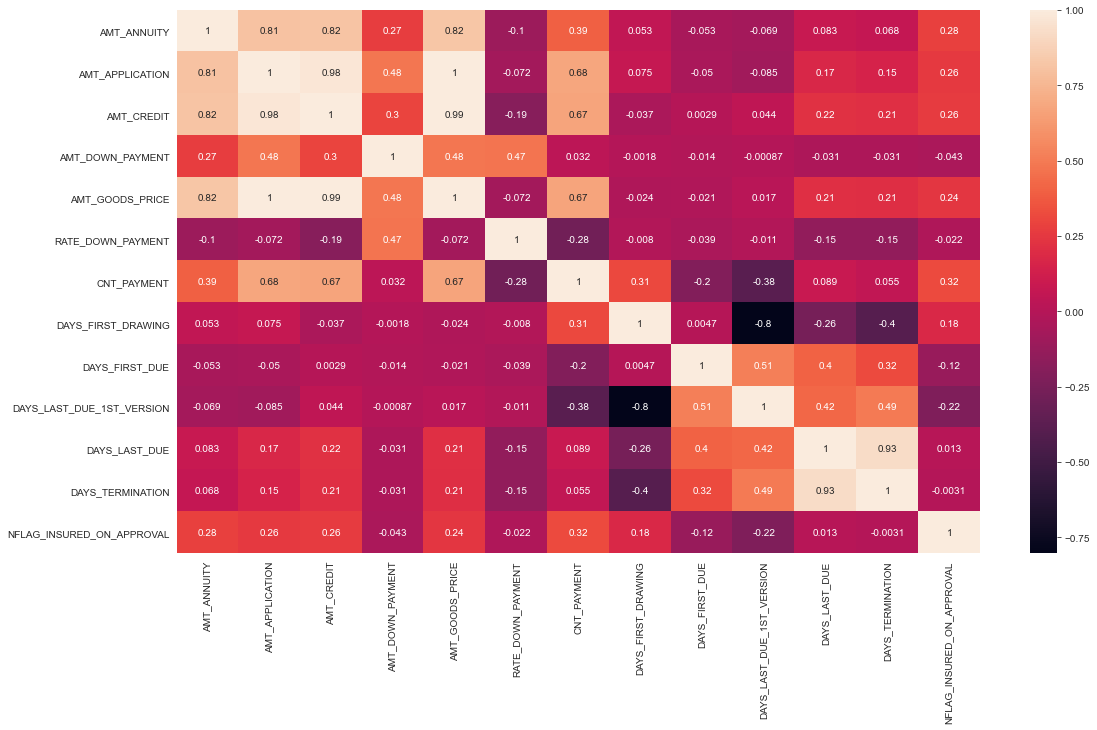

In [62]:
# Checking correlation between numeric features of previous application data

plt.figure(figsize=(18,10))
sns.heatmap(prev_num_df.corr(), annot=True)
plt.show()

### <font color="Green"> Inference -</font>
  - 'DAYS_LAST_DUE' and 'DAYS_TERMINATION' are highly correlated because they are showing constant value 1 on the plot.
  - 'DAYS_FIRST_DRAWING' and 'DAYS_LAST_DUE_1st_VERSION' have high negative correlation.
  - 'AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE' are highly correlated.

In [63]:
prev_ap_df.drop(['SK_ID_PREV'], axis=1, inplace=True)

In [64]:
prev_ap_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1669867 entries, 0 to 1670213
Data columns (total 34 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1669867 non-null  int64  
 1   NAME_CONTRACT_TYPE           1669867 non-null  object 
 2   AMT_ANNUITY                  1297978 non-null  float64
 3   AMT_APPLICATION              1669867 non-null  float64
 4   AMT_CREDIT                   1669867 non-null  float64
 5   AMT_DOWN_PAYMENT             774370 non-null   float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1669867 non-null  object 
 8   HOUR_APPR_PROCESS_START      1669867 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1669867 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1669867 non-null  int64  
 11  RATE_DOWN_PAYMENT            774370 non-null   float64
 12  NAME_CASH_LOAN_PURPOSE       1669867 non-n

In [65]:
print(prev_ap_df['NAME_TYPE_SUITE'].value_counts())

Unaccompanied      508970
Family             213263
Spouse, partner     67069
Children            31566
Other_B             17624
Other_A              9077
Group of people      2240
Name: NAME_TYPE_SUITE, dtype: int64


In [66]:
# Filling missing value as 'Unaccompanied' as most common value

prev_ap_df['NAME_TYPE_SUITE'].fillna(prev_ap_df.NAME_TYPE_SUITE.mode()[0], inplace=True)

In [67]:
# Merging only required columns of application_data with previous_application_data

prev_ap_merged = pd.merge(df[['SK_ID_CURR', 'TARGET']], prev_ap_df, how='left', on=['SK_ID_CURR'])

prev_ap_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1429841 entries, 0 to 1429840
Data columns (total 35 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1429841 non-null  int64  
 1   TARGET                       1429841 non-null  int64  
 2   NAME_CONTRACT_TYPE           1413387 non-null  object 
 3   AMT_ANNUITY                  1106482 non-null  float64
 4   AMT_APPLICATION              1413387 non-null  float64
 5   AMT_CREDIT                   1413387 non-null  float64
 6   AMT_DOWN_PAYMENT             664161 non-null   float64
 7   AMT_GOODS_PRICE              1094176 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1413387 non-null  object 
 9   HOUR_APPR_PROCESS_START      1413387 non-null  float64
 10  FLAG_LAST_APPL_PER_CONTRACT  1413387 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1413387 non-null  float64
 12  RATE_DOWN_PAYMENT            664161 non-nu

In [68]:
# Checking on the numeric data

prev_ap_merged.describe()

,SK_ID_CURR,TARGET,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.429841e+06,1.429841e+06,1.106482e+06,1.413387e+06,1.413387e+06,6.641610e+05,1.094176e+06,1.413387e+06,1.413387e+06,664161.000000,1.413387e+06,1.413387e+06,1.106487e+06,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000
mean,2.784721e+05,8.621658e-02,1.583720e+04,1.752825e+05,1.963976e+05,6.655317e+03,2.264512e+05,1.247888e+01,9.964313e-01,0.080175,-8.804742e+02,3.150476e+02,1.605195e+01,342257.656710,13488.741567,33274.831806,76665.634755,82353.171672,0.330572
std,1.028026e+05,2.806837e-01,1.472491e+04,2.936432e+05,3.195033e+05,2.062030e+04,3.159376e+05,3.331533e+00,5.963220e-02,0.107784,7.835932e+02,7.695935e+03,1.456674e+01,88832.266598,71650.147146,106161.775933,149704.716371,153537.064274,0.470419
min,1.000020e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.893620e+05,0.000000e+00,6.257880e+03,1.975500e+04,2.491200e+04,0.000000e+00,4.982850e+04,1.000000e+01,1.000000e+00,0.000000,-1.314000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1630.000000,-1244.000000,-1316.000000,-1269.000000,0.000000
50%,2.789590e+05,0.000000e+00,1.122376e+04,7.090200e+04,8.064000e+04,1.791000e+03,1.102455e+05,1.200000e+01,1.000000e+00,0.062489,-5.820000e+02,4.000000e+00,1.200000e+01,365243.000000,-825.000000,-358.000000,-534.000000,-494.000000,0.000000
75%,3.675110e+05,0.000000e+00,2.042111e+04,1.800000e+05,2.156400e+05,7.695000e+03,2.295000e+05,1.500000e+01,1.000000e+00,0.108912,-2.710000e+02,8.500000e+01,2.400000e+01,365243.000000,-408.000000,135.000000,-73.000000,-42.000000,1.000000
max,4.562550e+05,1.000000e+00,4.180581e+05,5.850000e+06,4.509688e+06,3.060045e+06,5.850000e+06,2.300000e+01,1.000000e+00,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


- ## Handling the outliners

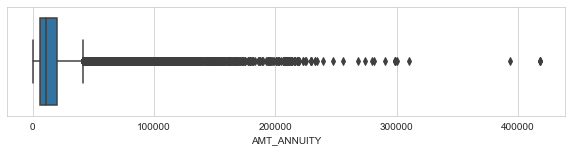

In [69]:
plt.figure(figsize=(10,2))
sns.boxplot(prev_ap_merged['AMT_ANNUITY'])
plt.show()

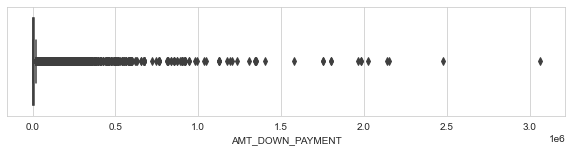

In [70]:
plt.figure(figsize=(10,2))
sns.boxplot(prev_ap_merged['AMT_DOWN_PAYMENT'])
plt.show()

In [71]:
# Excluding values outside 99 percentile for AMT_ANNUITY and AMT_DOWN_PAYMENT

prev_ap_merged = prev_ap_merged[prev_ap_merged['AMT_ANNUITY'] < np.nanpercentile(prev_ap_merged['AMT_ANNUITY'], 99)]
prev_ap_merged = prev_ap_merged[prev_ap_merged['AMT_DOWN_PAYMENT'] < np.nanpercentile(prev_ap_merged['AMT_DOWN_PAYMENT'], 99)]

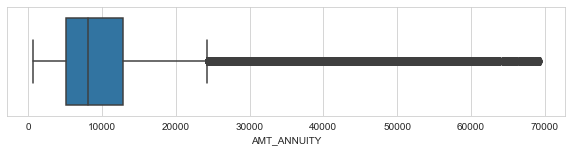

In [72]:
# Checking the features after updating.

plt.figure(figsize=(10,2))
sns.boxplot(prev_ap_merged['AMT_ANNUITY'])
plt.show()

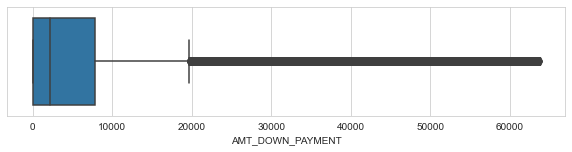

In [73]:
plt.figure(figsize=(10,2))
sns.boxplot(prev_ap_merged['AMT_DOWN_PAYMENT'])
plt.show()

- ## Checking Data Imbalance.

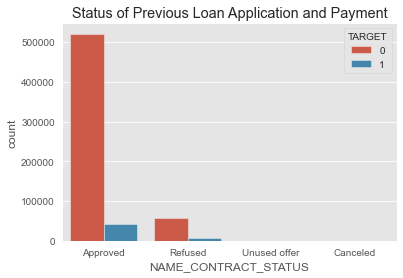

In [74]:
plt.style.use("ggplot")
plt.title("Status of Previous Loan Application and Payment")
sns.countplot(prev_ap_merged['NAME_CONTRACT_STATUS'], hue=prev_ap_merged['TARGET'])
plt.show()

In [75]:
# Percentage of previously approved loan applicants that defaulted in current loan

total_approved = prev_ap_merged[prev_ap_merged['NAME_CONTRACT_STATUS'] == "Approved"].shape[0]
default_approved = prev_ap_merged[(prev_ap_merged['TARGET'] == 1) & (prev_ap_merged['NAME_CONTRACT_STATUS'] == "Approved")].shape[0]

print("Percentage of previously approved loan applicants that defaulted in current loan : ", (default_approved*100/total_approved))

Percentage of previously approved loan applicants that defaulted in current loan :  7.354523610066182


In [76]:
# Percentage of previously refused loan applicants that were able to pay current loan

total_refused = prev_ap_merged[prev_ap_merged['NAME_CONTRACT_STATUS'] == "Refused"].shape[0]
nondefault_refused = prev_ap_merged[(prev_ap_merged['TARGET'] == 0) & (prev_ap_merged['NAME_CONTRACT_STATUS'] == "Refused")].shape[0]

print("Percentage of previously refused loan applicants that were able to pay current loan : ", (nondefault_refused*100/total_refused))

Percentage of previously refused loan applicants that were able to pay current loan :  90.18283846699349


### <font color="Green"> Inference -</font>

  - The applicants whose previous loans were approved are more likely to pay current loan in time, than the applicants whose previous loans were rejected.

  - 7% of the previously approved loan applicants that defaulted in current loan

  - 90 % of the previously refused loan applicants that were able to pay current loan

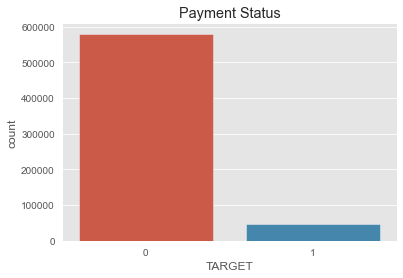

In [77]:
plt.title("Payment Status")
sns.countplot(prev_ap_merged['TARGET'])
plt.show()

### <font color="Green"> Inference -</font>

  - As you can see this data is highly imbalanced as number of defaulter is very less in total population denoted by red and blue bar graph.

- ## Univariate, Bivariate and Multivariate Analysis

In [78]:
print(prev_ap_merged.FLAG_LAST_APPL_PER_CONTRACT.value_counts())
print(prev_ap_merged.NFLAG_LAST_APPL_IN_DAY.value_counts())

Y    628193
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: int64
1.0    627967
0.0       226
Name: NFLAG_LAST_APPL_IN_DAY, dtype: int64


### <font color="Green"> Inference -</font>

  - 'FLAG_LAST_APPL_PER_CONTRACT' can be dropped from the data for having fixed value in all entries.

  - 'NFLAG_LAST_APPL_IN_DAY' can be dropped from the data for having highly imbalance data.

- ## Analysis of Numeric Features of Previous Application Data

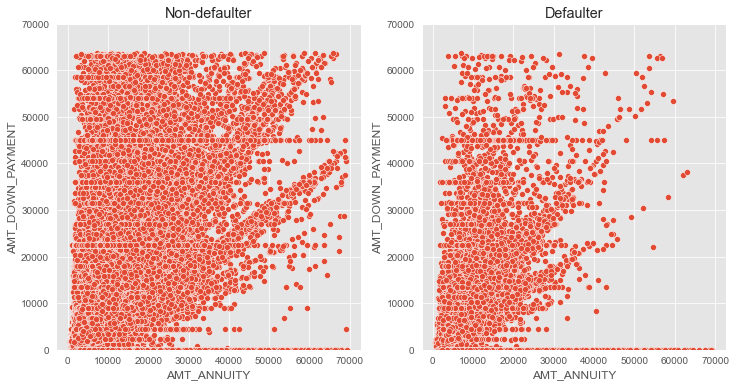

In [79]:
# Setting equal y-limit for both sub-plots for better comparison

fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, ylim=(0,70000), title="Non-defaulter")
ax2 = fig.add_subplot(1, 2, 2, ylim=(0,70000), title="Defaulter")

sns.scatterplot(prev_ap_merged[prev_ap_merged["TARGET"] == 0]['AMT_ANNUITY'], prev_ap_merged[prev_ap_merged["TARGET"] == 0]['AMT_DOWN_PAYMENT'], ax=ax1)
sns.scatterplot(prev_ap_merged[prev_ap_merged["TARGET"] == 1]['AMT_ANNUITY'], prev_ap_merged[prev_ap_merged["TARGET"] == 1]['AMT_DOWN_PAYMENT'], ax=ax2)

plt.show()


### <font color="Green"> Inference -</font>

  - If you see the data insights for down payment , the defaulter cases are much less.
  - Number of defaulters are less found in previous application data for larger amount of annuity. 

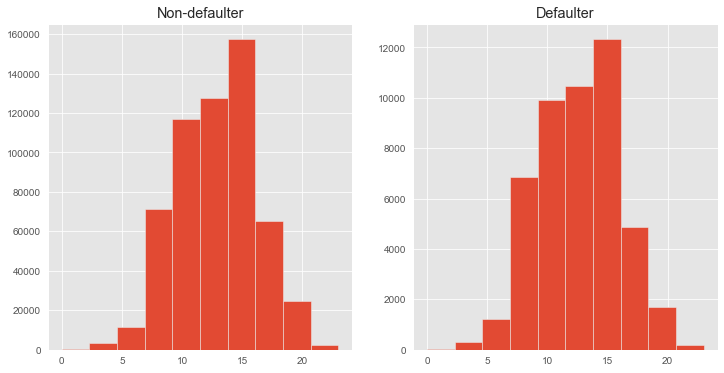

In [80]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, title="Non-defaulter")
ax2 = fig.add_subplot(1, 2, 2, title="Defaulter")

prev_ap_merged[prev_ap_merged["TARGET"] == 0]["HOUR_APPR_PROCESS_START"].hist(bins=10, ax=ax1)
prev_ap_merged[prev_ap_merged["TARGET"] == 1]["HOUR_APPR_PROCESS_START"].hist(bins=10, ax=ax2)

plt.show()

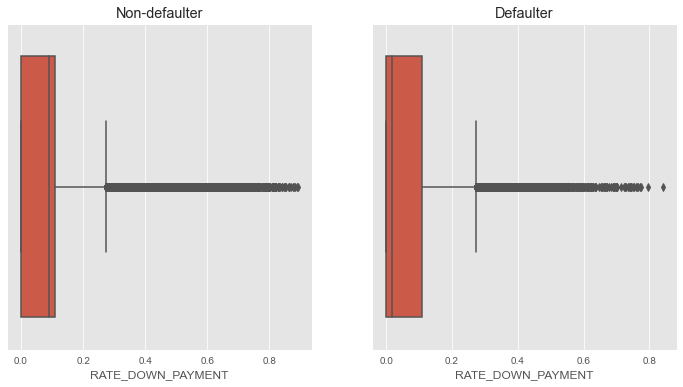

In [81]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, title="Non-defaulter")
ax2 = fig.add_subplot(1, 2, 2, title="Defaulter")

sns.boxplot(prev_ap_merged[prev_ap_merged["TARGET"] == 0]['RATE_DOWN_PAYMENT'], ax=ax1)
sns.boxplot(prev_ap_merged[prev_ap_merged["TARGET"] == 1]['RATE_DOWN_PAYMENT'], ax=ax2)

plt.show()


In [82]:
# Percentile of RATE_DOWN_PAYMENT for non-defaulters

prev_ap_merged[prev_ap_merged["TARGET"] == 0]['RATE_DOWN_PAYMENT'].quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50    0.091255
0.70    0.108909
0.90    0.211895
0.95    0.282832
0.99    0.498074
Name: RATE_DOWN_PAYMENT, dtype: float64

In [83]:
# Percentile of RATE_DOWN_PAYMENT for defaulters

prev_ap_merged[prev_ap_merged["TARGET"] == 1]['RATE_DOWN_PAYMENT'].quantile([0.5, 0.7, 0.9, 0.95, 0.99])


0.50    0.017238
0.70    0.104260
0.90    0.199685
0.95    0.232643
0.99    0.454294
Name: RATE_DOWN_PAYMENT, dtype: float64

### <font color="Green"> Inference -</font>

  - For those who had lower rate of down payment in previous application, cases of default are higher.

- ## Analysis of Categorical Features of Previous Application Data

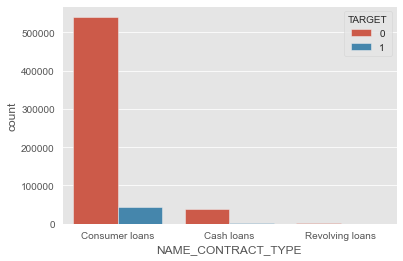

In [84]:
sns.countplot(prev_ap_merged.NAME_CONTRACT_TYPE, hue=prev_ap_merged.TARGET)
plt.show()

### <font color="Green"> Inference -</font>

  - Highest number of loans are applied for Consumer Loans

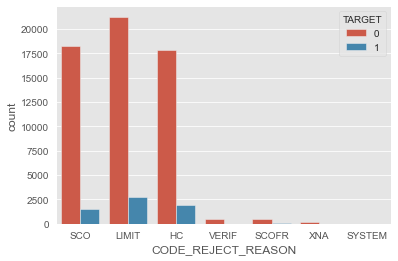

In [85]:
sns.countplot(prev_ap_merged[prev_ap_merged['NAME_CONTRACT_STATUS'] == "Refused"]["CODE_REJECT_REASON"], hue=prev_ap_merged.TARGET)
plt.show()

### <font color="Green"> Inference -</font>

  - As you can see in the above plot, 'SCO', 'LIMIT' and 'HC' are the most common reason of rejection for the loan application.

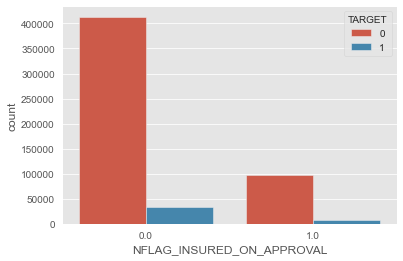

In [86]:
sns.countplot(prev_ap_merged['NFLAG_INSURED_ON_APPROVAL'], hue=prev_ap_merged['TARGET'])
plt.show()

### <font color="Green"> Inference -</font>

  - Most of the people did not request insurance during previous loan application.

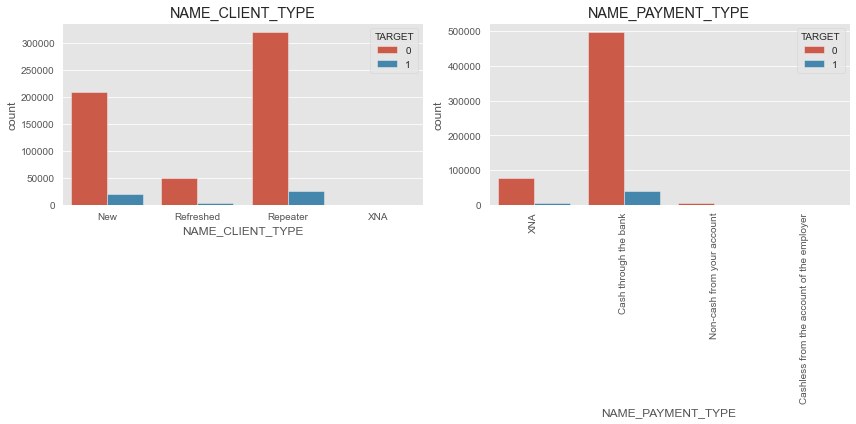

In [87]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, title="NAME_CLIENT_TYPE")
ax2 = fig.add_subplot(1, 2, 2, title="NAME_PAYMENT_TYPE")

sns.countplot(prev_ap_merged['NAME_CLIENT_TYPE'], hue=prev_ap_merged['TARGET'], ax=ax1)
sns.countplot(prev_ap_merged['NAME_PAYMENT_TYPE'], hue=prev_ap_merged['TARGET'], ax=ax2)
plt.xticks(rotation=90)

plt.tight_layout()

plt.show()

### <font color="Green"> Inference -</font>

  - Most of the applicants are repeater and also Cash through the bank is the most frequently used payment method.

In [88]:
def value_wise_defaulter_percentage(df, col):
    new_df = pd.DataFrame(columns=['Value', 'Percentage of Defaulter'])
    
    for value in df[col].unique():
        default_cnt = df[(df[col] == value) & (df.TARGET == 1)].shape[0]
        total_cnt = df[df[col] == value].shape[0]
        new_df = new_df.append({'Value' : value , 'Percentage of Defaulter' : (default_cnt*100/total_cnt)}, ignore_index=True)
    return new_df.sort_values(by='Percentage of Defaulter', ascending=False)

In [89]:
value_wise_defaulter_percentage(prev_ap_merged, 'NAME_GOODS_CATEGORY')


,Value,Percentage of Defaulter
23,Insurance,10.526316
0,Vehicles,10.257410
14,Jewelry,9.124951
17,Auto Accessories,9.029763
3,Mobile,8.615336
15,Office Appliances,8.307692
8,Computers,8.074335
20,Weapon,8.064516
21,Direct Sales,8.024691
5,Audio/Video,7.698706


In [90]:
value_wise_defaulter_percentage(prev_ap_merged, 'NAME_PORTFOLIO')


,Value,Percentage of Defaulter
2,Cards,17.119695
0,POS,7.666139
1,Cash,6.384448
3,Cars,0.000000


In [91]:
value_wise_defaulter_percentage(prev_ap_merged, 'NAME_PRODUCT_TYPE')

,Value,Percentage of Defaulter
1,walk-in,9.165550
0,XNA,7.665995
2,x-sell,6.036420


In [92]:
value_wise_defaulter_percentage(prev_ap_merged, 'CHANNEL_TYPE')

,Value,Percentage of Defaulter
4,AP+ (Cash loan),15.000000
1,Country-wide,7.908171
2,Regional / Local,7.551291
0,Stone,7.294692
3,Credit and cash offices,6.124197
5,Contact center,4.545455
6,Car dealer,0.000000


In [93]:
value_wise_defaulter_percentage(prev_ap_merged, 'NAME_SELLER_INDUSTRY')

,Value,Percentage of Defaulter
0,Auto technology,10.522088
9,Jewelry,9.019221
3,Connectivity,8.780637
2,Consumer electronics,7.451983
7,Industry,7.211664
4,Construction,6.597424
5,XNA,6.226598
1,Furniture,5.924492
6,Clothing,5.857399
8,Tourism,4.778157


In [94]:
value_wise_defaulter_percentage(prev_ap_merged, 'NAME_YIELD_GROUP')

,Value,Percentage of Defaulter
4,XNA,17.119695
2,high,8.340935
1,middle,7.558098
0,low_normal,6.844973
3,low_action,6.608936


In [95]:
value_wise_defaulter_percentage(prev_ap_merged, 'PRODUCT_COMBINATION')

,Value,Percentage of Defaulter
13,Card Street,17.195005
4,POS mobile with interest,8.761056
0,POS other with interest,7.953141
3,POS mobile without interest,7.888514
2,POS household with interest,7.752151
11,POS others without interest,7.256127
15,Card X-Sell,6.666667
5,POS household without interest,6.649376
9,Cash Street: middle,6.475391
10,Cash Street: high,6.417625


### <font color="Green"> Inference -</font>

  Now we will discuss the data collected from different value wise defaulter as shown above.
  
   - From name goods category we can see that Highest percentage of default cases are for the applicants who previously applied for Insurance and Vehicles.
   
   - Similerly from name portfolio we can say that Cards defaulter rate is highest.
   
   - From name product type all the walk-in applicants 9% defaulted in current loan.
   
   - 15% loan applicatiant defaulted for AP+ (Cash Loan) this insight is from channel type.
   
   - From seller industry we can say that In seller Industry "Auto technology" has highest rate of defaulter and MLM partners has lowest number of defaulters
   
   - Defaulter percentage is highest where NAME_YIELD_GROUP is not known.
   
   - Finally we found that highest percentage of default cases is for Card Street.
   

- ## <font color="Green">Conclusion.</font>

 - ### Insights about given dataset.
 
    1. There are feature columns in the dataset that are highly correlated to each other. Which means both will have similar impact on the target value. Those features can be removed before feeding this data to a model to avoid collinearity.
    
    2. Feature columns with 50% or more missing data can be dropped.
    
 - ### Recommended step for given dataset.
 
     1. Following columns should be converted to integer. DAYS_FIRST_DRAWING float64 DAYS_FIRST_DUE float64 DAYS_LAST_DUE_1ST_VERSION float64 DAYS_LAST_DUE float64 DAYS_TERMINATION float64.
     
     2. We can covert this NFLAG_INSURED_ON_APPROVAL float64 column into interger column because it contains only 0 and 1.
     
 - ### Details of different value wise defaulters and important features.
     1. We can see that 7% of the previously approved loan applicants that defaulted in current loan.
     
     2. Total 90 % of the previously refused loan applicants that were able to pay current loan.
     
     3. the most common reason of rejection are 'SCO', 'LIMIT' and 'HC'.

     4. Most of the people did not request insurance during previous loan application.

     5. For "Cards" defaulter percentage is highest (17%). 'NAME_PORTFOLIO' is an important feature for analyzing 'TARGET' variable.

     6. 15% loan applicatiant defaulted for AP+ (Cash Loan). 'CHANNEL_TYPE' is an important feature for analyzing 'TARGET' variable.

     7. Highest percentage (17%) of default cases is for 'Card Street'.